# Surprise Housing Price detection of Houses in  Australian market

### In this Assignment we are building the model using Linear regression and Regularization

#### Steps for the Regrsssion and Regularization

 - Load data
 - clean the data if any missing values
 - find the variable which influence the price
 - split the data
 - tain the model 
 - make regularization

In [98]:
# Loading the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# import the warning to avoid the unwanted warning
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Load dataset pd.read_csv()
df = pd.read_csv('train.csv')
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [101]:
len(df.index)

1460

 Data frame contains 1460 rows and 80 columns,Need to find which are most effecting columns

In [102]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [104]:
#getting the nulls present in the dataframe
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [105]:
# getting nulls in %
round(100*(df.isnull().sum()/len(df.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [106]:
print(list(round(100*(df.isnull().sum()/len(df.index)),2)))

[0.0, 0.0, 0.0, 17.74, 0.0, 0.0, 93.77, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55, 0.55, 0.0, 0.0, 0.0, 2.53, 2.53, 2.6, 2.53, 0.0, 2.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 47.26, 5.55, 5.55, 5.55, 0.0, 0.0, 5.55, 5.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.52, 80.75, 96.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


The columns which are having more than __50%__ null doesn't contribute the data

# Data Cleaning 

In [107]:
#Getting remove the columns are null which are more than 50%
missing_col = round(100*(df.isnull().sum()/len(df.index)),2)
missing_col

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [108]:
missing_col.loc[missing_col>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [109]:
missing_cols = list(missing_col[missing_col>=50.00].index)
print(missing_cols)


['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [110]:
#Drop the columns which have nan values more than 50%
df1 = df.drop(missing_cols,axis=1)
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [111]:
# the ID columns also doesn't contribute to the model we can drop that column
df1 = df1.drop('Id',axis=1)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [112]:
# getting cols into one variable
cols = list(df1.columns)
cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [114]:
# getting remaining null columlns
round(100*(df1.isnull().sum()/len(df1.index)),2)[round(100*(df1.isnull().sum()/len(df1.index)),2).values>0.00]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [115]:
# Imputing the values based on the column values wiht mode or median
print(df1['GarageType'].value_counts())
print(df1['GarageYrBlt'].value_counts())
print(df1['GarageFinish'].value_counts())
print(df1['GarageQual'].value_counts())
print(df1['GarageCond'].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [116]:
# Here the 'GarageType', 'GarageFinish', 'GarageQual',  'GarageCond' are the categoriacal and they are nan due to No Garage so
# Impute with No Garage in it and 'GarageYrBlt' with mode value 2005
for c in ['GarageType', 'GarageFinish', 'GarageQual',  'GarageCond']:
    df1[c].fillna('No Garage',inplace=True)
df1['GarageYrBlt'].fillna(2005.0,inplace=True)

In [117]:
# getting remaining null columlns
round(100*(df1.isnull().sum()/len(df1.index)),2)[round(100*(df1.isnull().sum()/len(df1.index)),2).values>0.00]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
dtype: float64

In [118]:
# Repalcing categorical 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' with No Basement due to they are none
# because of no basement
for c in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df1[c].fillna('No Basement',inplace=True)

In [119]:
# getting remaining null columlns
round(100*(df1.isnull().sum()/len(df1.index)),2)[round(100*(df1.isnull().sum()/len(df1.index)),2).values>0.00]

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
FireplaceQu    47.26
dtype: float64

In [120]:
df1.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [121]:
df1['Electrical'].fillna('SBrkr',inplace=True)

In [122]:
df1.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [123]:
print(df1['MasVnrType'].value_counts())
print(df1['MasVnrArea'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [124]:
df1['MasVnrArea'].mean()

103.68526170798899

In [125]:
# Replacning the values of MasVnrType with mode of column, MasVnrArea with mean
df1['MasVnrType'].fillna('None',inplace=True)
df1['MasVnrArea'].fillna(df1['MasVnrArea'].mean(),inplace=True)

In [126]:
# getting remaining null columlns
round(100*(df1.isnull().sum()/len(df1.index)),2)[round(100*(df1.isnull().sum()/len(df1.index)),2).values>0.00]

LotFrontage    17.74
FireplaceQu    47.26
dtype: float64

In [127]:
df1['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [128]:
# Replacing the LotFrontage with median of it's value
df1['LotFrontage'].fillna(df1['LotFrontage'].median(),inplace=True)

In [129]:
# Replaing the Nan Values of FireplaceQu with No Fireplace
df1['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [130]:
# getting remaining null columlns
round(100*(df1.isnull().sum()/len(df1.index)),2)[round(100*(df1.isnull().sum()/len(df1.index)),2).values>0.00]

Series([], dtype: float64)

In [131]:
round(100*(df1.isnull().sum()/len(df1.index)),2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 76, dtype: float64

In [132]:
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [133]:
#Store the cleandata in csv
df1.to_csv('clean_data.csv',index=False)

# Detecting Outlies in the cleaned data

In [134]:
# loading cleaned data set
clean_df = pd.read_csv('clean_data.csv')
clean_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [135]:
print(clean_df.shape)


(1460, 76)


In [136]:
Not_num =[]
Num = []
for c in clean_df.columns:
    if df1[c].dtype == 'object':
        Not_num.append(c)
    else:
        Num.append(c)
print(Not_num)
print(Num)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [137]:
# to detect outlier we have can do it in only numerical terms for this first we need to describe only numerical term
Num_df = clean_df[Num]

In [138]:
Num_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


__from the above describe function we can say that there are outliers present in the Numericl terms of data__

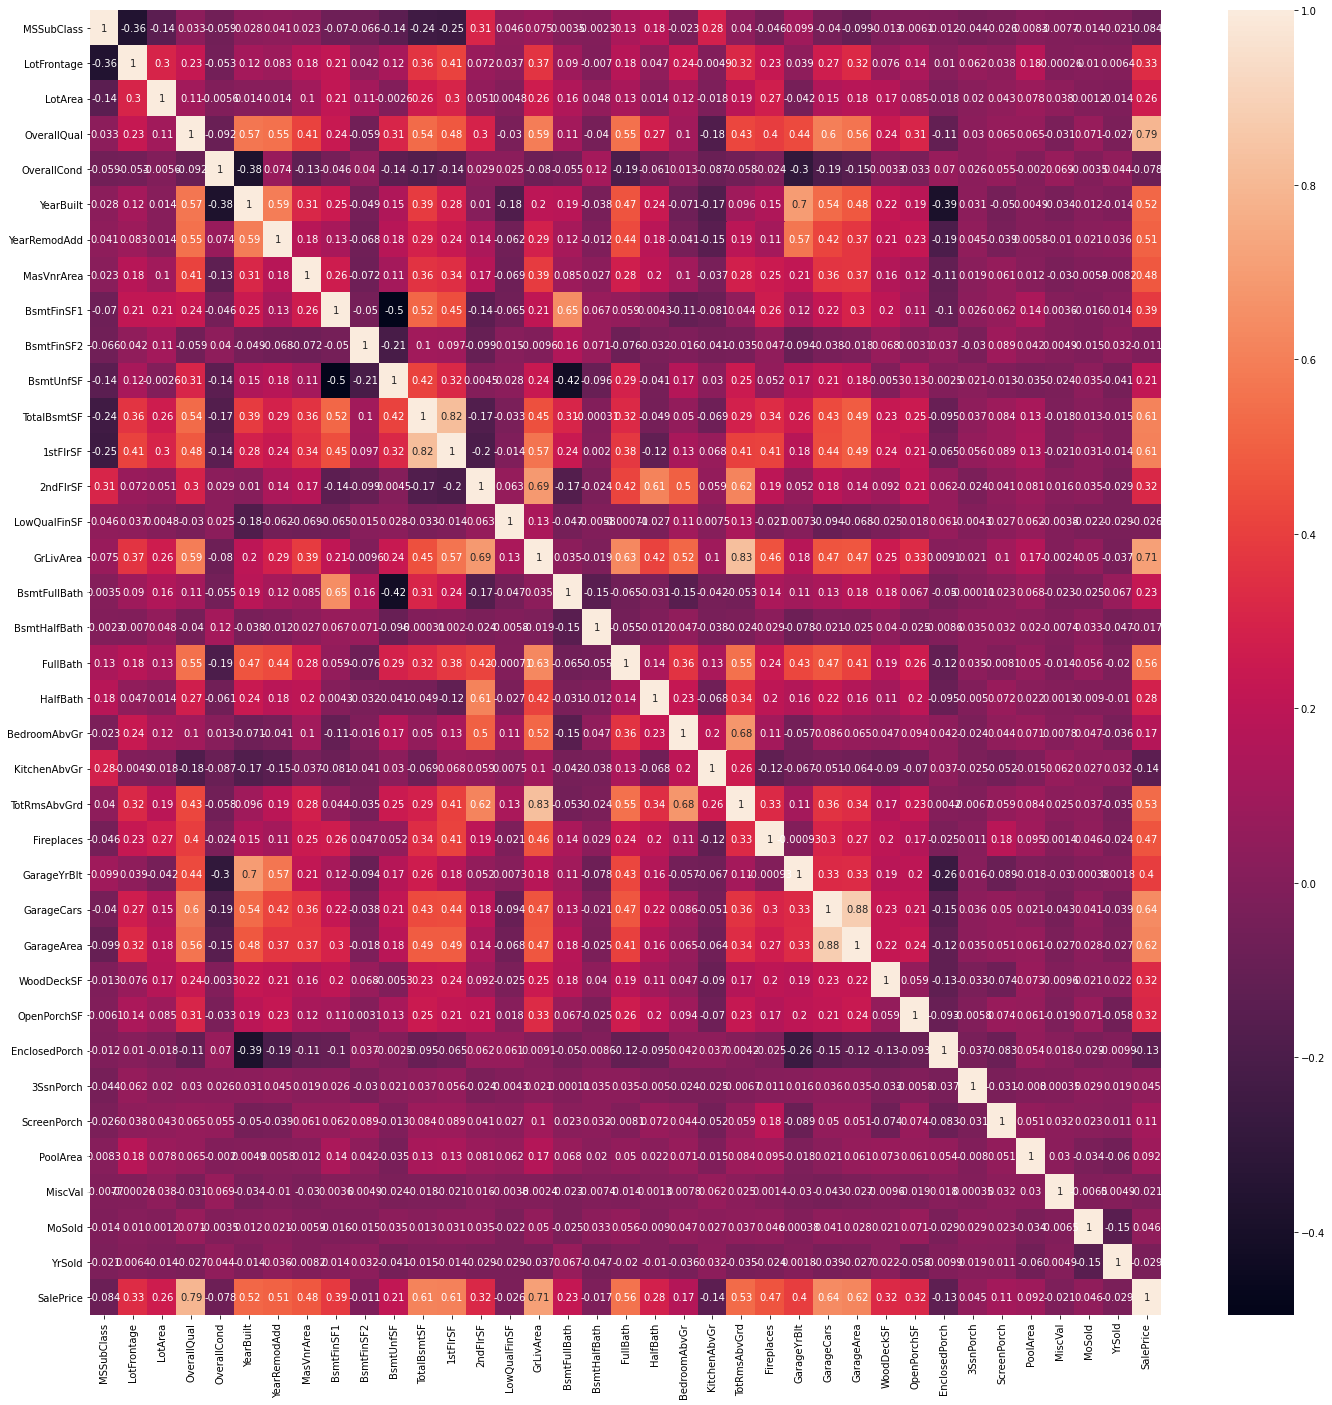

In [139]:
# Heat map for correlation

plt.figure(figsize=(24, 24))
sns.heatmap(Num_df.corr(),annot=True)

In [140]:
# function for outlier detection 
def drop_outliers(y):
    list = []
    for col in Num:
        Q1 = y[col].quantile(.25)
        Q3 = y[col].quantile(.99)
        IQR = Q3-Q1
        y =  y[(y[col] >= (Q1-(1.5*IQR))) & (y[col] <= (Q3+(1.5*IQR)))] 
    return y 

In [141]:
drop_outliers(clean_df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


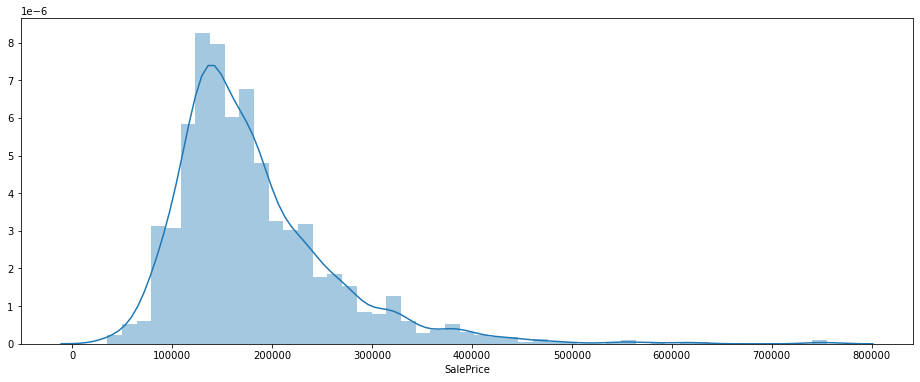

In [142]:
# Plotting the Sales price for outliers
plt.figure(figsize=(16,6))
sns.distplot(clean_df.SalePrice)
plt.show()

# Creating the Dummies for the Categorical Variables

In [143]:
# We can crate dummies by using get_dummies function for all the categorial variable keeping drop first as true
dummy_col = pd.get_dummies(clean_df[Not_num],drop_first=True)

dummy_col.shape

(1460, 210)

In [144]:
# concating the dummies to the dataframe
df_concat = pd.concat([clean_df,dummy_col],axis=1)
df_concat.shape

(1460, 286)

In [145]:
# Dropping the categorical columns for better model
df_concat1 = df_concat.drop(Not_num,axis=1)

In [146]:
df_concat1[['YearBuilt','YrSold']]

,YearBuilt,YrSold
0,2003,2008
1,1976,2007
2,2001,2008
3,1915,2006
4,2000,2008
...,...,...
1455,1999,2007
1456,1978,2010
1457,1941,2010
1458,1950,2010


In [147]:
drop_outliers(df_concat1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0,0,0,0,1,0,0,0,1,0
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,1,0,0,0,1,0


In [148]:
# Getting the age of House current year- Year Build will give the age of year
import datetime
df_concat1['Current_year'] = datetime.datetime.now().year
df_concat1['Age'] = df_concat1['Current_year']-df_concat1['YearBuilt']
df_concat1['Age']

0        18
1        45
2        20
3       106
4        21
       ... 
1455     22
1456     43
1457     80
1458     71
1459     56
Name: Age, Length: 1460, dtype: int64

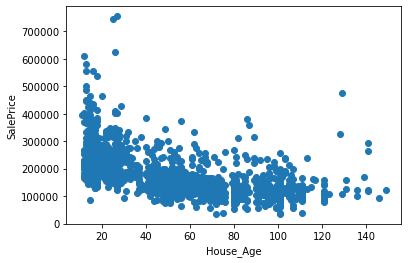

In [149]:
# relation between age and saleprice 
plt.scatter(x=df_concat1['Age'], y=df_concat['SalePrice'])
plt.xlabel("House_Age"); 
plt.ylabel("SalePrice");

In [150]:
# Remove the columns current year and year built
df_concat2=df_concat1.drop(['Current_year','YearBuilt'],axis=1)
df_concat2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,1,0,18
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,1,0,45
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,1,0,20
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,0,0,1,0,0,0,0,0,106
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,1,0,22
1456,20,85.0,13175,6,6,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,1,0,43
1457,70,66.0,9042,7,9,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,1,0,80
1458,20,68.0,9717,5,6,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,1,0,71


## Spliting the Data as train and test data

In [151]:
# Library for the train_test split of dat
from sklearn.model_selection import train_test_split

In [152]:
X = df_concat2.drop('SalePrice', axis=1)
y = df_concat2['SalePrice']

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1021, 246) (438, 246) (1021,) (438,)


In [154]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
210,30,67.0,5604,5,6,1950,0.0,468,0,396,...,0,0,0,1,0,0,0,1,0,96
318,60,90.0,9900,7,5,1993,256.0,987,0,360,...,0,0,0,1,0,0,0,1,0,28
239,50,52.0,8741,6,4,1950,0.0,94,0,641,...,0,0,0,1,0,0,0,1,0,76
986,50,59.0,5310,6,8,2003,0.0,0,0,485,...,0,0,0,1,0,0,0,1,0,111
1416,190,60.0,11340,4,6,1950,0.0,0,0,777,...,0,0,0,1,0,0,0,1,0,136


In [155]:
y_train.head()

210      98000
318     260000
239     113000
986     117000
1416    122500
Name: SalePrice, dtype: int64

# Scaling

## Scaling the Values of numerical values of dataframe by Standard scaler

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [157]:
# Scaling only featues of Num columns not the cateogy columns 
Num1 = Num[:]
Num1.append('Age')
Num1.remove('SalePrice')
Num1.remove('YearBuilt')

In [158]:
#Scaling the X_train
X_train[Num1]= scaler.fit_transform(X_train[Num1])
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.694350,-0.560537,0.043512,-0.293313,-0.374367,...,0,0,0,1,0,0,0,1,0,1.524903
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.390956,0.807462,1.160345,-0.293313,-0.454644,...,0,0,0,1,0,0,0,1,0,-0.717033
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-1.694350,-0.560537,-0.761296,-0.293313,0.171964,...,0,0,0,1,0,0,0,1,0,0.865510
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,0.875911,-0.560537,-0.963574,-0.293313,-0.175904,...,0,0,0,1,0,0,0,1,0,2.019448
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-1.694350,-0.560537,-0.963574,-0.293313,0.475233,...,0,0,0,1,0,0,0,1,0,2.843689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-0.195040,-0.432493,-0.435334,-0.779861,-0.533005,-1.694350,-0.560537,-0.963574,-0.293313,0.990346,...,0,0,0,1,0,0,0,1,0,1.491933
802,0.035976,-0.296554,-0.221924,0.649651,-0.533005,0.972902,-0.560537,0.430853,-0.293313,-1.079023,...,0,0,0,1,0,0,0,1,0,-1.112669
53,-0.888086,-0.069989,3.861098,2.079162,-0.533005,0.099983,-0.560537,2.931352,-0.293313,-1.186059,...,0,0,0,1,0,0,0,1,0,-0.321398
350,1.422070,-0.069989,-0.258706,2.079162,-0.533005,1.069893,1.373899,-0.963574,-0.293313,2.910309,...,0,1,0,0,0,0,0,0,1,-1.178608


In [159]:
#Scaling the values of X_test values
X_test[Num1]= scaler.transform(X_test[Num1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.560537,0.361992,-0.293313,-0.704396,...,0,0,0,1,0,0,0,1,0,0.008299
57,0.035976,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.560537,-0.963574,-0.293313,0.660317,...,0,0,0,1,0,0,0,1,0,-1.079700
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.357475,-0.963574,-0.293313,1.500998,...,0,0,0,1,0,0,0,1,0,-0.782973
382,0.035976,0.428455,-0.120412,0.649651,-0.533005,1.021398,-0.560537,-0.963574,-0.293313,0.836481,...,0,0,0,1,0,0,0,1,0,-1.145639
1170,0.498007,0.292515,-0.058786,-0.065105,0.383154,-0.384972,-0.560537,0.159714,-0.293313,0.022559,...,0,0,0,1,0,0,0,1,0,-0.189519


# Model Building and Evalution

## Linear Regression

Detect the saleprice of house by Linear Regression

In [160]:
# importing the Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [161]:
lr = LinearRegression()

In [162]:
# Fitting to  linear regression model
lr.fit(X_train,y_train)

LinearRegression()

In [163]:
# predicting the test variable
y_pred = lr.predict(X_test)
len(y_pred)


438

In [164]:
y_pred_train = lr.predict(X_train)

In [165]:
# r2_score for the train dataset
print(r2_score(y_train,y_pred_train))
#r2_score for the test dataset
print(r2_score(y_test,y_pred))

0.9492957182330226
-2.231404867296676e+20


From the above metrics we can say the model is __overfitting__ to avoid OverFitting we have to do __Regularization__

In [166]:
# Print the coefficients and intercept
print(lr.intercept_)
print(lr.coef_)

-626042.5351371204
[-9.22670994e+02  1.97034625e+03  7.29234211e+03  9.05934824e+03
  6.43798513e+03  2.27052659e+03  3.92264154e+03 -1.58889272e+16
 -5.83863083e+15 -1.53329392e+16  1.56907744e+16 -4.60319404e+16
 -5.03448179e+16 -5.57551177e+15  6.15307520e+16  9.38000000e+02
 -2.36500000e+02  1.06750000e+02 -1.83200000e+03 -3.09837500e+03
 -3.67550000e+03 -8.20750000e+02  2.35400000e+03  1.23550000e+03
  3.38075000e+03  1.71500000e+03  1.15400000e+03  1.21175000e+03
 -4.28125000e+02  6.67500000e+02  5.91625000e+02  3.60250000e+03
  3.87750000e+02 -4.05500000e+02 -8.19500000e+02  2.66368281e+04
  2.62702500e+04  2.69863594e+04  2.20727031e+04  3.16356562e+04
 -1.11031250e+03  3.48570312e+02  1.41662500e+03  2.12591797e+03
 -8.63637500e+03  4.05478125e+03 -4.08960938e+03  9.82200000e+03
 -6.10893750e+03  4.69102344e+03  3.10000000e+01  4.13290625e+03
 -3.04721875e+04  1.69035156e+04  6.32950000e+03  7.85456250e+03
 -6.31681250e+03 -2.67950000e+03  2.52785000e+04 -6.88950000e+03
 -2.18

In [216]:
# Another linear model using Recurssive Feature Elimination RFE to avoid selcting mulitple variable which take huge time 
from sklearn.feature_selection import RFE
lm_rfe = LinearRegression()
lm_rfe.fit(X_train,y_train)
rfe = RFE(lm_rfe,50)
rfe = rfe.fit(X_train,y_train)

In [217]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 140),
 ('LotFrontage', False, 137),
 ('LotArea', False, 44),
 ('OverallQual', False, 6),
 ('OverallCond', False, 59),
 ('YearRemodAdd', False, 156),
 ('MasVnrArea', False, 98),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 157),
 ('BsmtHalfBath', False, 189),
 ('FullBath', False, 190),
 ('HalfBath', False, 139),
 ('BedroomAbvGr', False, 110),
 ('KitchenAbvGr', False, 91),
 ('TotRmsAbvGrd', False, 170),
 ('Fireplaces', False, 172),
 ('GarageYrBlt', False, 136),
 ('GarageCars', False, 70),
 ('GarageArea', False, 159),
 ('WoodDeckSF', False, 185),
 ('OpenPorchSF', False, 146),
 ('EnclosedPorch', False, 171),
 ('3SsnPorch', False, 174),
 ('ScreenPorch', False, 178),
 ('PoolArea', False, 106),
 ('MiscVal', False, 186),
 ('MoSold', False, 180),
 ('YrSold', False, 167),
 ('MSZoning_FV', Fa

In [218]:
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Neighborhood_NoRidge',
       'Condition2_PosN', 'BldgType_Duplex', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtCond_No Basement',
       'BsmtExposure_Gd', 'BsmtFinType1_No Basement', 'Heating_OthW',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Mod',
       'Functional_Sev', 'GarageType_No Garage', 'GarageFinish_No Garage',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_No Garage',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_No Garage', 'GarageCond_Po', 'GarageCond_TA',
       'SaleType_Con', 'Sa

In [170]:
col = list(col)
col

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'Neighborhood_NoRidge',
 'Condition2_PosN',
 'BldgType_Duplex',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_No Basement',
 'BsmtQual_TA',
 'BsmtCond_No Basement',
 'BsmtExposure_Gd',
 'BsmtFinType1_No Basement',
 'Heating_OthW',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Mod',
 'Functional_Sev',
 'GarageType_No Garage',
 'GarageFinish_No Garage',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_No Garage',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_No Garage',
 'GarageCond_Po',
 'GarageCond_TA',
 'SaleType_Con',
 'SaleType_New',
 'SaleCondition_Partial']

### Evaluating the model using the r2_score and mean score using RFE

In [173]:
y_train_prd= lm_rfe.predict(X_train)

In [174]:
# r2_score for the training dataset after RFE
r2_score(y_train,y_train_prd)

0.9492957182330226

In [175]:
print(lm_rfe.coef_)

[-9.22670994e+02  1.97034625e+03  7.29234211e+03  9.05934824e+03
  6.43798513e+03  2.27052659e+03  3.92264154e+03 -1.58889272e+16
 -5.83863083e+15 -1.53329392e+16  1.56907744e+16 -4.60319404e+16
 -5.03448179e+16 -5.57551177e+15  6.15307520e+16  9.38000000e+02
 -2.36500000e+02  1.06750000e+02 -1.83200000e+03 -3.09837500e+03
 -3.67550000e+03 -8.20750000e+02  2.35400000e+03  1.23550000e+03
  3.38075000e+03  1.71500000e+03  1.15400000e+03  1.21175000e+03
 -4.28125000e+02  6.67500000e+02  5.91625000e+02  3.60250000e+03
  3.87750000e+02 -4.05500000e+02 -8.19500000e+02  2.66368281e+04
  2.62702500e+04  2.69863594e+04  2.20727031e+04  3.16356562e+04
 -1.11031250e+03  3.48570312e+02  1.41662500e+03  2.12591797e+03
 -8.63637500e+03  4.05478125e+03 -4.08960938e+03  9.82200000e+03
 -6.10893750e+03  4.69102344e+03  3.10000000e+01  4.13290625e+03
 -3.04721875e+04  1.69035156e+04  6.32950000e+03  7.85456250e+03
 -6.31681250e+03 -2.67950000e+03  2.52785000e+04 -6.88950000e+03
 -2.18256250e+03  7.92806

In [180]:
y_pred_test = lm_rfe.predict(X_test)

In [181]:
y_pred_train = lm_rfe.predict(X_train)
y_pred_test = lm_rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9492957182330226
-2.231404867296676e+20
323528749798.8994
6.289688859733834e+32
316874387.65807974
1.4360020227702816e+30


# Ridge and Lasso Regularization

## Ridge

In [182]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [183]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [184]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [205]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-7.18141357e+03 -2.59405771e+03  3.90399139e+03  1.62195767e+04
  5.39470371e+03  2.19588138e+03  4.57682295e+03  3.04660580e+01
  1.15641183e+03  1.42348814e+03  1.85218339e+03  5.97824647e+03
  1.33308097e+04 -1.13324670e+03  1.52770609e+04  5.39200298e+03
  7.21422945e+02  3.61277070e+03  9.00523730e+02 -1.70341134e+03
 -3.19731239e+03  2.37685178e+03  2.76221330e+03 -5.94711596e+01
  9.91655565e+03 -2.56488260e+02  2.02717601e+03 -7.76984107e+02
  6.65017890e+02  1.51013192e+03  1.30825416e+03 -4.66224425e+02
 -1.58907662e+02 -6.31651249e+02 -1.16890229e+03  3.37637144e+03
  1.50303679e+03  4.44484713e+03 -2.58605858e+03  3.76877964e+03
  1.35577440e+03 -7.99354493e+03  4.56436713e+02  7.31171091e+03
  4.77564651e+03  1.03928857e+04 -1.84672776e+03  7.07810396e+03
 -6.09216091e+03 -1.37496061e+03 -1.30880912e+03  5.67895288e+03
 -9.61227842e+02 -4.92072024e+02 -3.19795553e+02  1.04579800e+03
  1.91841039e+03 -5.51579669e+03  1.33542471e+04 -1.53259770e+04
 -7.19185206e+03 -2.91294

In [203]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8850603925297394
0.8686906725329555
733395015397.8572
370123246683.2317
718310495.0027984
845030243.5690222


In [187]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018190,0.003185,0.008603,0.003368,0.0001,{'alpha': 0.0001},0.862165,0.566131,0.708193,0.283774,...,0.659892,0.219817,28,0.955235,0.951274,0.952858,0.952592,0.954964,0.953385,0.001502
1,0.019730,0.004158,0.007797,0.004397,0.001,{'alpha': 0.001},0.862912,0.566386,0.710718,0.308251,...,0.665631,0.211863,27,0.955213,0.951273,0.952836,0.952577,0.954941,0.953368,0.001495
2,0.017697,0.010713,0.004525,0.006179,0.01,{'alpha': 0.01},0.865738,0.568750,0.727896,0.489169,...,0.706753,0.156778,26,0.953798,0.951255,0.951417,0.951509,0.953450,0.952286,0.001101
3,0.019725,0.003186,0.008845,0.003028,0.05,{'alpha': 0.05},0.856774,0.577061,0.748609,0.758371,...,0.762411,0.105176,25,0.944909,0.950976,0.942447,0.943321,0.943913,0.945113,0.003039
4,0.018752,0.011691,0.006250,0.007654,0.1,{'alpha': 0.1},0.848274,0.585177,0.753875,0.829201,...,0.775481,0.102137,23,0.938468,0.950451,0.936022,0.936361,0.936929,0.939646,0.005467


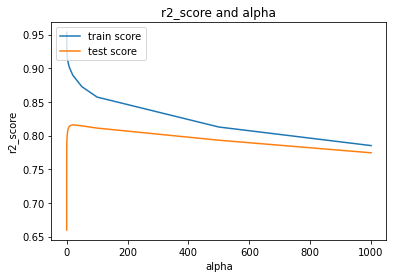

In [188]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2_score')

plt.title("r2_score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Lasso

In [189]:
lasso = Lasso()

#cross Validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv= folds,
                        return_train_score= True,
                        verbose = 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   40.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [190]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [191]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
lasso = Lasso(alpha = alpha)
lasso.fit(X_train,y_train)
print(lasso.coef_)

[-7.17866751e+03 -1.47293236e+03  3.29031988e+03  1.99912305e+04
  4.82803025e+03  2.77977899e+03  3.55778551e+03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.96268519e+03  0.00000000e+00
  3.61366790e+02 -1.47286088e+03  2.50761147e+04  5.49476020e+03
  4.34309002e+02  2.61283712e+03  4.90341892e+02 -7.81619974e+02
 -2.66062382e+03  3.91906244e+02  3.51372081e+03  1.85823179e+03
  8.09241984e+03  0.00000000e+00  1.83029181e+03 -0.00000000e+00
  0.00000000e+00  9.94839224e+02  1.20237887e+03 -1.19008455e+03
 -0.00000000e+00 -1.53048733e+02 -7.67478945e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.33627695e+03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.16126073e+03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  8.56648471e+03 -7.75284977e+03
 -0.00000000e+00 -0.00000

In __Lasso__ most of the coeffiecients are zero. we can say that this is best coefficient

In [192]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8557762235892084
0.8492039233193788
920248477000.3877
425050790867.3347
901320741.4303503
970435595.5875221


In [193]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.332295,0.020219,0.006124,0.005823,0.0001,{'alpha': 0.0001},0.862209,0.558363,0.706252,0.284167,...,0.657872,0.220123,28,0.955235,0.951271,0.952858,0.952592,0.954964,0.953384,0.001503
1,0.319878,0.043513,0.003125,0.006250,0.001,{'alpha': 0.001},0.862214,0.558424,0.706315,0.284069,...,0.657882,0.220158,27,0.955235,0.951271,0.952858,0.952592,0.954964,0.953384,0.001503
2,0.359606,0.033698,0.001399,0.002799,0.01,{'alpha': 0.01},0.862264,0.559029,0.706734,0.283540,...,0.658016,0.220336,26,0.955235,0.951271,0.952858,0.952592,0.954964,0.953384,0.001503
3,0.430609,0.029451,0.011373,0.006090,0.05,{'alpha': 0.05},0.862483,0.561697,0.707823,0.284426,...,0.659046,0.219943,25,0.955235,0.951270,0.952858,0.952591,0.954964,0.953384,0.001503
4,0.336149,0.026474,0.005324,0.006682,0.1,{'alpha': 0.1},0.862755,0.564734,0.708774,0.285907,...,0.660236,0.219306,24,0.955234,0.951269,0.952857,0.952591,0.954964,0.953383,0.001503


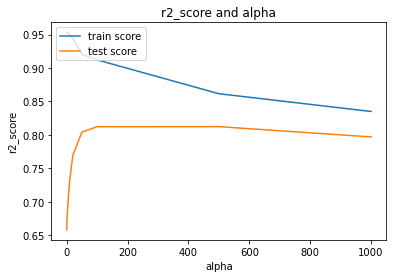

In [194]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2_score')

plt.title("r2_score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [195]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.492957e-01,8.850604e-01,8.557762e-01
1,R2 Score (Test),-2.231405e+20,8.686907e-01,8.492039e-01
2,RSS (Train),3.235287e+11,7.333950e+11,9.202485e+11
3,RSS (Test),6.289689e+32,3.701232e+11,4.250508e+11
4,MSE (Train),1.780097e+04,2.680132e+04,3.002200e+04
5,MSE (Test),1.198333e+15,2.906940e+04,3.115182e+04


## Lets observe the changes in the coefficients after regularization

In [196]:
betas = pd.DataFrame(index=X_train.columns)

In [197]:
betas.rows = X_train.columns

In [198]:
betas['Linear'] = lm_rfe.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [199]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-9.226710e+02,-7181.413568,-7178.667511
LotFrontage,1.970346e+03,-2594.057709,-1472.932358
LotArea,7.292342e+03,3903.991385,3290.319879
OverallQual,9.059348e+03,16219.576747,19991.230526
OverallCond,6.437985e+03,5394.703714,4828.030246
YearRemodAdd,2.270527e+03,2195.881379,2779.778992
MasVnrArea,3.922642e+03,4576.822952,3557.785508
BsmtFinSF1,-1.588893e+16,30.466058,0.000000
BsmtFinSF2,-5.838631e+15,1156.411825,-0.000000
BsmtUnfSF,-1.533294e+16,1423.488137,0.000000


### Conclusion


1. Optimum value for lambda in ridge regression is 20
2. Optimum value for lambda in lasso regression is 500